<h1 align="center">EDA (Exploratory Data Analysis)</h1>

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('../data/raw_dataset/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Now we analyze some basic information from the dataset

In [3]:
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [4]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


## Missing values

Let's explore if in the dataset are some missing values

In [5]:
missing_data = df.isnull()
missing_data.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Timestamp
Timestamp
False    736
Name: count, dtype: int64

Age
Age
False    735
True       1
Name: count, dtype: int64

Primary streaming service
Primary streaming service
False    735
True       1
Name: count, dtype: int64

Hours per day
Hours per day
False    736
Name: count, dtype: int64

While working
While working
False    733
True       3
Name: count, dtype: int64

Instrumentalist
Instrumentalist
False    732
True       4
Name: count, dtype: int64

Composer
Composer
False    735
True       1
Name: count, dtype: int64

Fav genre
Fav genre
False    736
Name: count, dtype: int64

Exploratory
Exploratory
False    736
Name: count, dtype: int64

Foreign languages
Foreign languages
False    732
True       4
Name: count, dtype: int64

BPM
BPM
False    629
True     107
Name: count, dtype: int64

Frequency [Classical]
Frequency [Classical]
False    736
Name: count, dtype: int64

Frequency [Country]
Frequency [Country]
False    736
Name: count, dtype: int64

Frequency [EDM]
Frequency [EDM]

There is missing values in the following columns:
- Age (1)
- Primary Streaming service (1)
- While working (3)
- Instrumentalist (4)
- Composer (1)
- Foreign languages (4)
- BPM (107)
- Music effects (8)

Later we will work with these missing values.


## Analyzing Individual Feature Patterns Using Visualization

### Numeric Variables

First of all lets analize the correlation between numeric variables

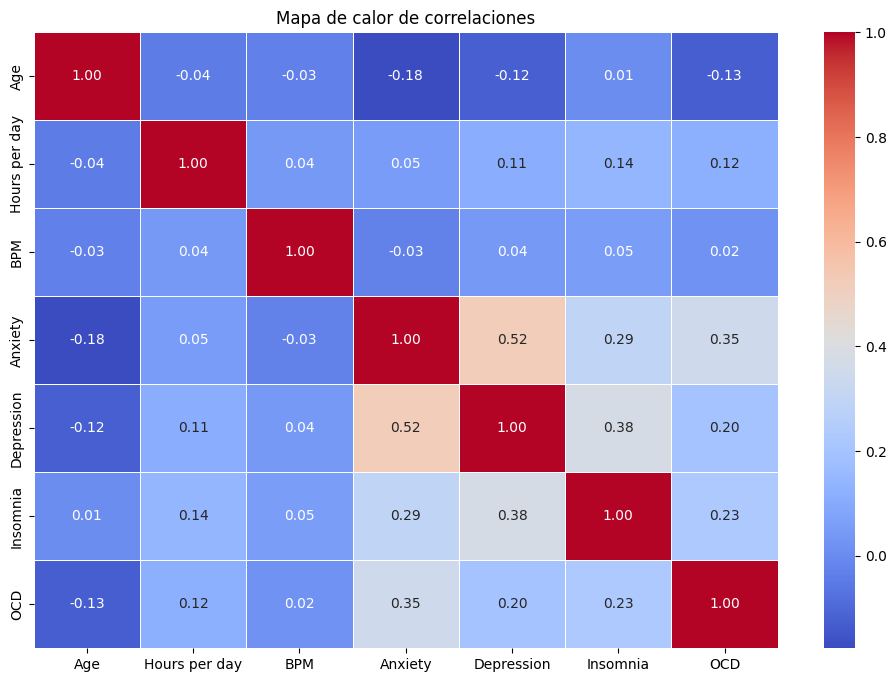

In [7]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()

Now lets see some graphs

In [8]:
# Select only numeric
columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']

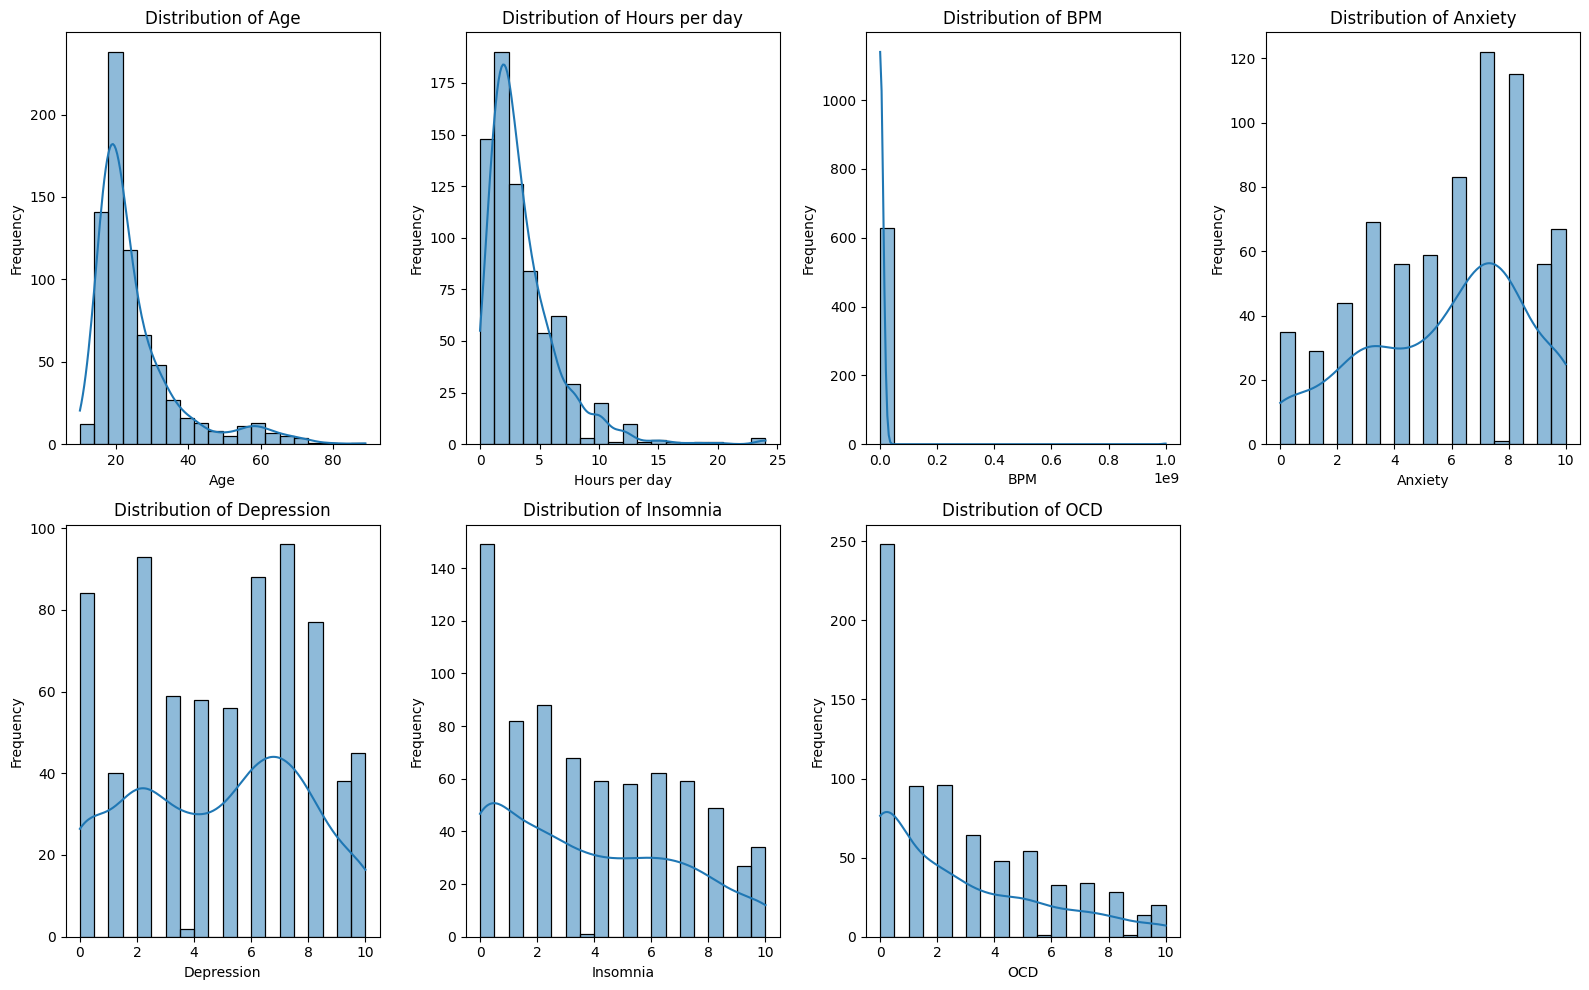

In [9]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))  
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title("Distribution of " + col)

# Hide the last plot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


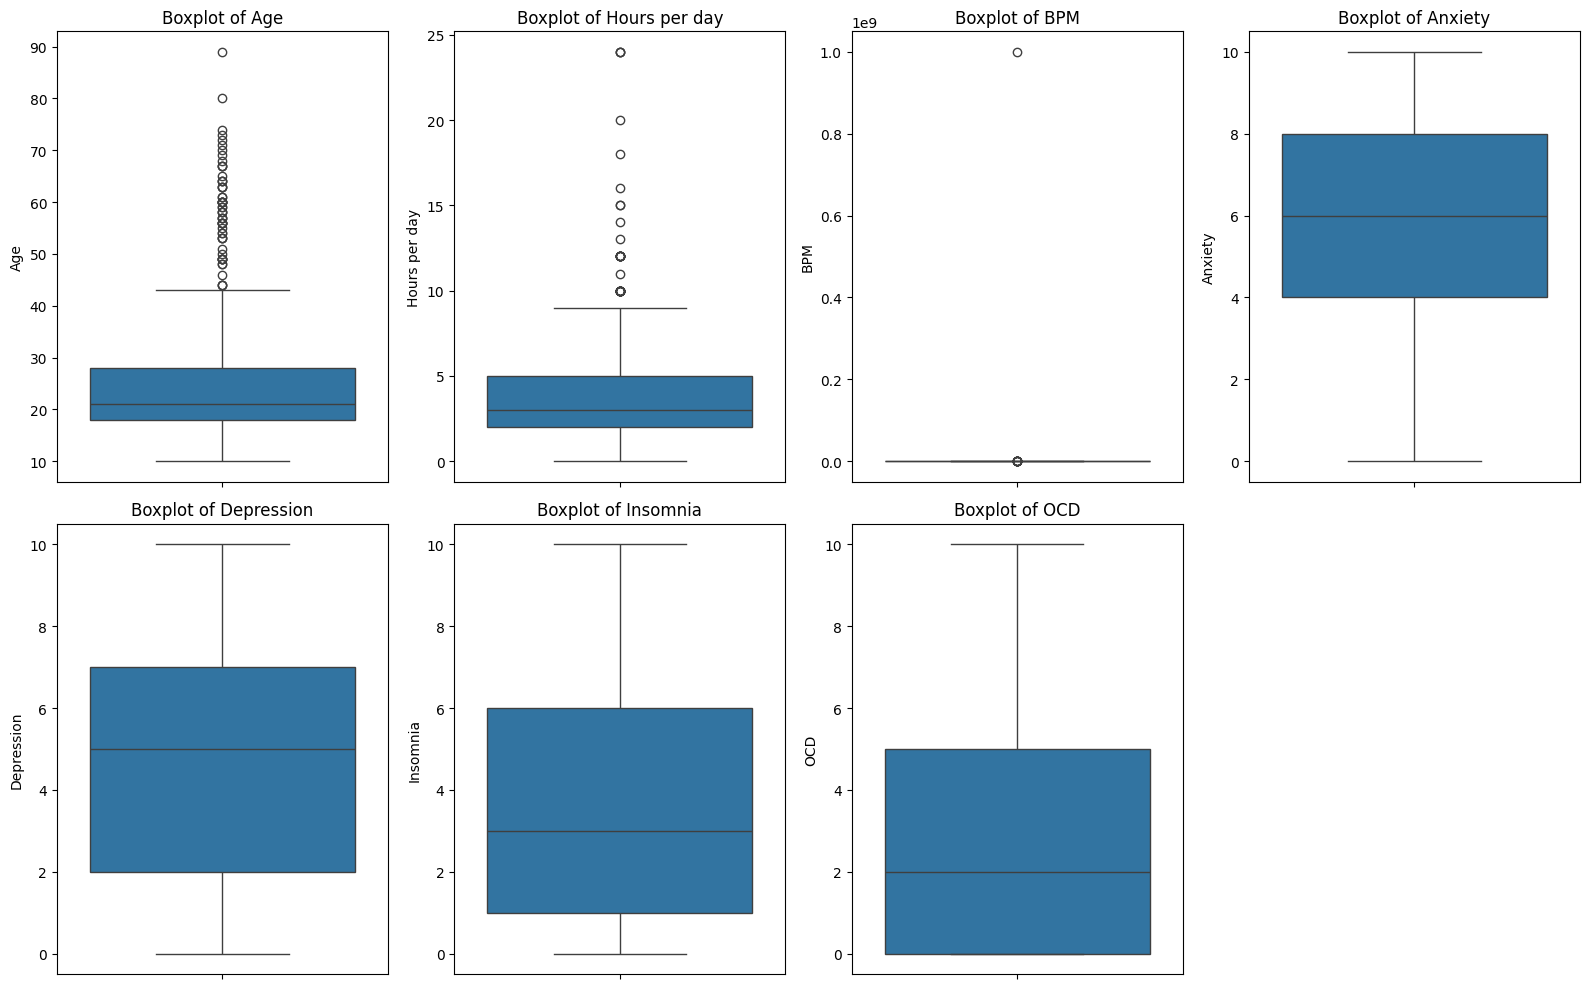

In [41]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title("Boxplot of " + col)

# Hide the last plot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Categorical Values

Now lets analyze some of the most important categorical values

In [10]:
# Select only categorical columns
categorical_df = df.select_dtypes(include=['object'])
print(categorical_df.columns)

Index(['Timestamp', 'Primary streaming service', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects',
       'Permissions'],
      dtype='object')


In [11]:
columns = ['Primary streaming service', 'Fav genre', 'Music effects']

/var/folders/qp/xg6wbr314v34q4vszdf0dhyw0000gn/T/ipykernel_24040/4021590674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/qp/xg6wbr314v34q4vszdf0dhyw0000gn/T/ipykernel_24040/4021590674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/qp/xg6wbr314v34q4vszdf0dhyw0000gn/T/ipykernel_24040/4021590674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax

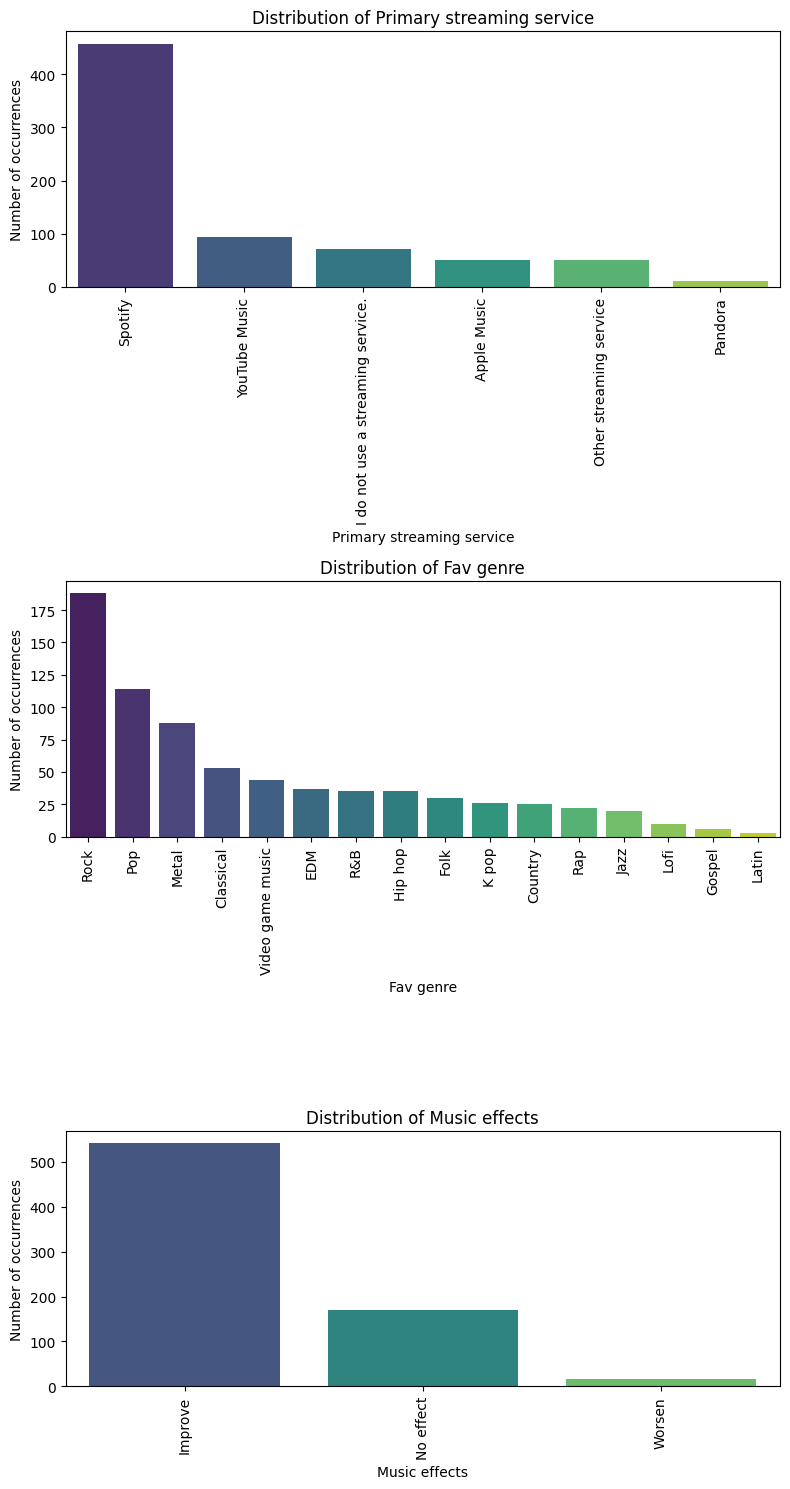

In [12]:
# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Number of occurrences')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
    

## Multivariate Analysis

Here we are going to compare key variables such as Hours per day and fav genre with the main variables that describes the person mental health

In [13]:
mental_health_cols = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

### Hours per Day and Mental Health

Correlation between hours per day' and Anxiety: 0.049
Correlation between hours per day' and Depression: 0.111
Correlation between hours per day' and Insomnia: 0.142
Correlation between hours per day' and OCD: 0.119


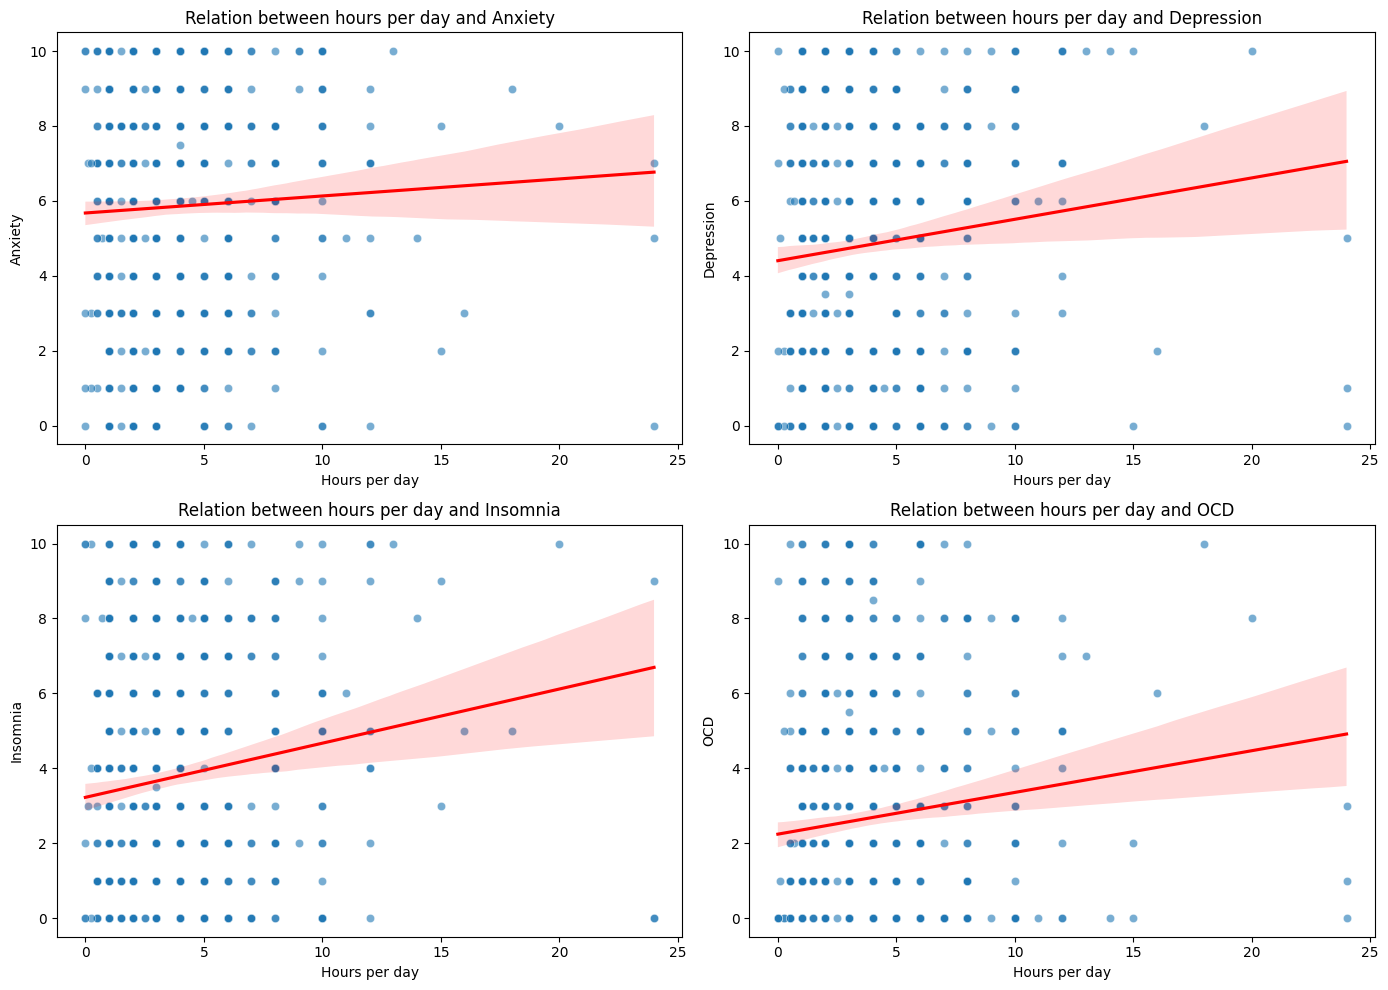

In [14]:
# Calculate correlation between 'Hours per day' and mental health columns
for col in mental_health_cols:
    print(f"Correlation between hours per day' and {col}: {df['Hours per day'].corr(df[col]):.3f}")

# Create scatter plots with regression lines
plt.figure(figsize=(14, 10))
for i, col in enumerate(mental_health_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x='Hours per day', y=col, data=df, alpha=0.6)
    sns.regplot(x='Hours per day', y=col, data=df, scatter=False, color='red')
    plt.title(f'Relation between hours per day and {col}')
plt.tight_layout()

### Fav Genre and Mental Health

<Figure size 1400x800 with 0 Axes>

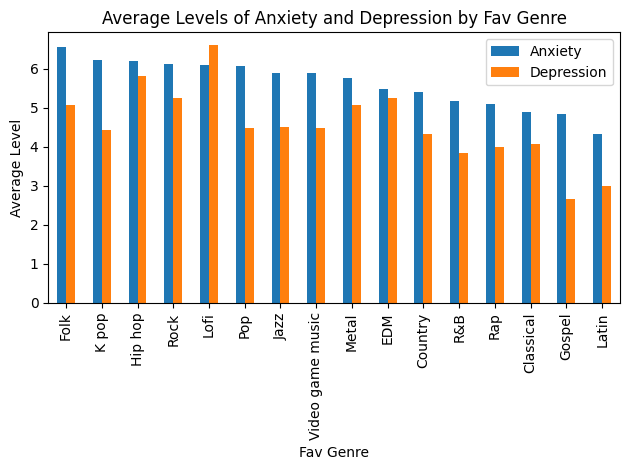

<Figure size 1600x1000 with 0 Axes>

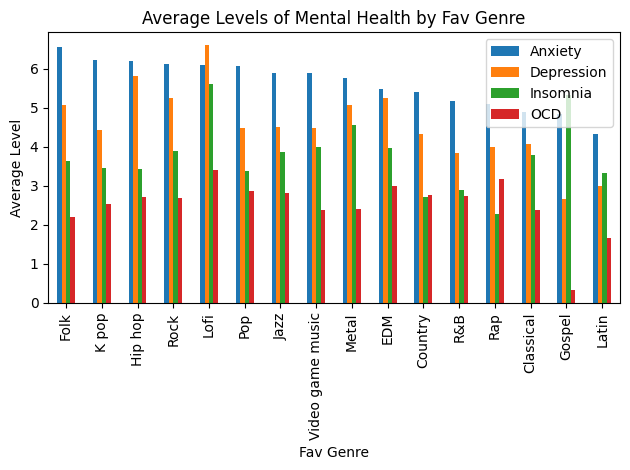

In [15]:
genre_mental_health = df.groupby('Fav genre')[mental_health_cols].mean().sort_values('Anxiety', ascending=False)

plt.figure(figsize=(14, 8))
genre_mental_health[['Anxiety', 'Depression']].plot(kind='bar')
plt.title('Average Levels of Anxiety and Depression by Fav Genre')
plt.xlabel('Fav Genre')
plt.ylabel('Average Level')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.figure(figsize=(16, 10))
genre_mental_health.plot(kind='bar')
plt.title('Average Levels of Mental Health by Fav Genre')
plt.xlabel('Fav Genre')
plt.ylabel('Average Level')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

### Music Effects and Mental Health

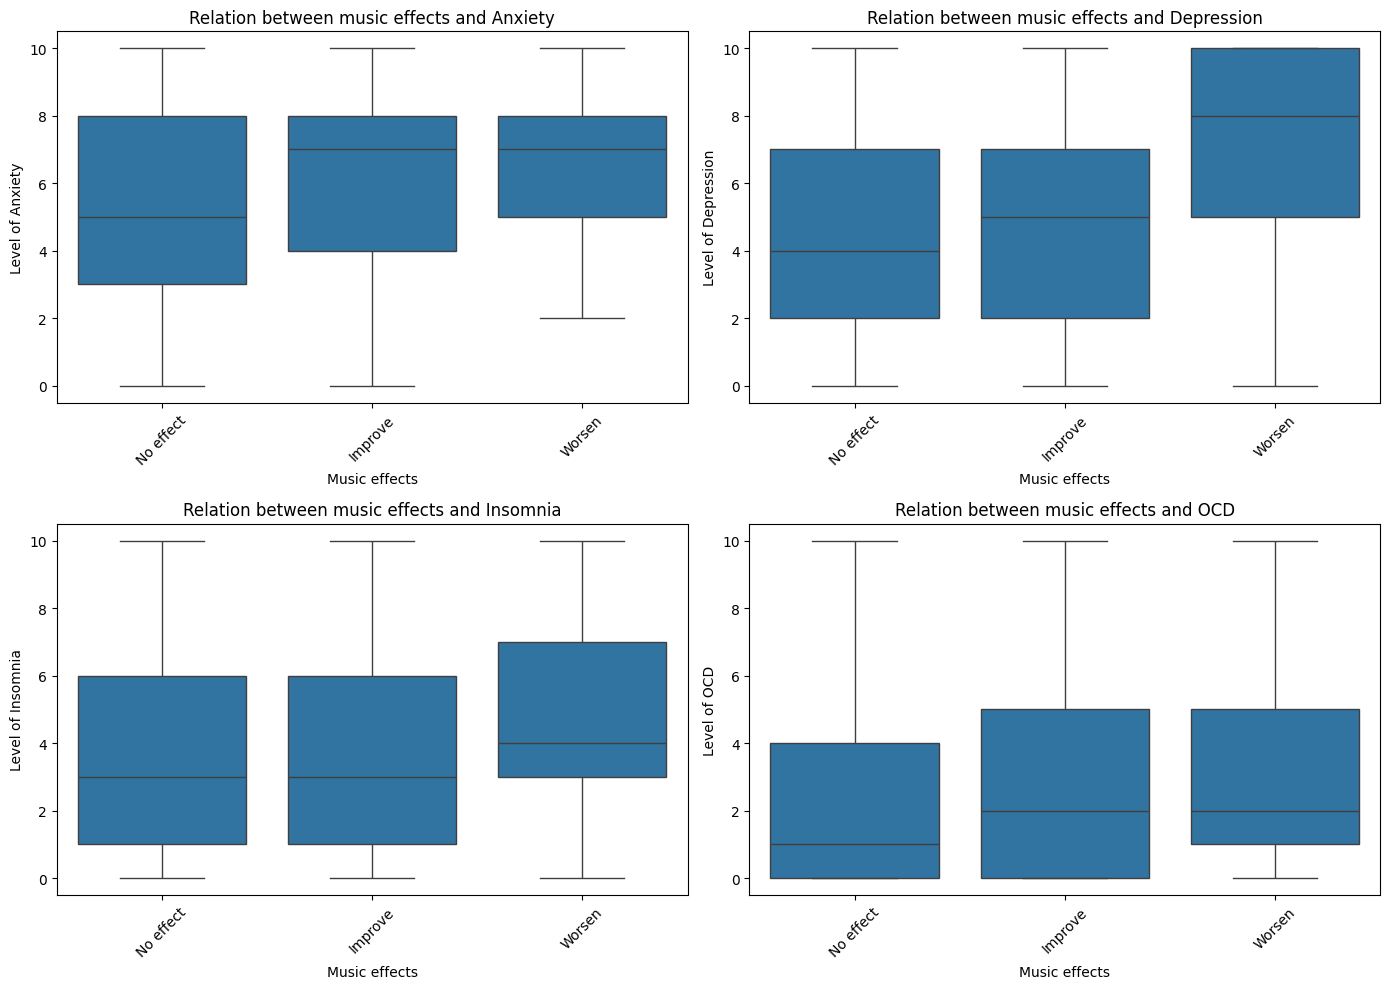

In [16]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(mental_health_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Music effects', y=col, data=df)
    plt.title(f'Relation between music effects and {col}')
    plt.xlabel('Music effects')
    plt.ylabel('Level of ' + col)
    plt.xticks(rotation=45)
plt.tight_layout()

## General Analysis found on the EDA

In this EDA, we explored how music habits relate to mental health by looking at things like favorite genres, streaming platforms, and how many hours people listen per day. We found some missing values in columns like BPM, music effects, and a few others, so we’ll need to handle that before moving forward. We looked at numeric features like anxiety, depression, and insomnia scores, and how they correlate with music preferences. For example, some genres like lofi and classical were more often linked with mental health improvements, while people who listen for many hours a day sometimes showed higher anxiety or depression levels. We also compared favorite genres and listening time with mental health indicators to spot any patterns.

Next step is cleaning the dataset, and here’s a simple plan for that:
- Handle missing values – We can drop rows with too many missing values, fill others with mean/mode, or use “Unknown” for some categorical ones.
- Fix data types – Make sure numerical and categorical columns are correctly typed.
- Normalize or scale numerical features if needed (especially BPM and hours per day).
- Encode categorical features like genres and streaming services for modeling.
- Drop unnecessary columns like timestamps or permissions if they don’t add value.

This whole cleaning process will be done in a separate Python script called “data cleansing”, and the result will be saved as a new .csv file with the cleaned dataset ready to use.